<a href="https://colab.research.google.com/github/Henry-Medeiros/programming-challenge-3-ShawnYu111/blob/main/Programming_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2020-11-23 22:24:17--  https://raw.githubusercontent.com/Henry-Medeiros/images/master/organisms.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159777 (156K) [image/jpeg]
Saving to: ‘organisms.jpg.2’

organisms.jpg.2     100%[===================>] 156.03K  --.-KB/s    in 0.03s   

2020-11-23 22:24:17 (5.37 MB/s) - ‘organisms.jpg.2’ saved [159777/159777]



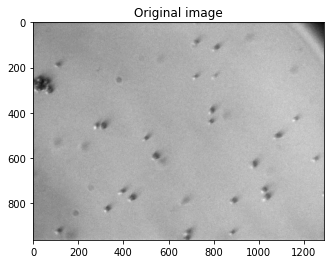

In [8]:
# The image below corresponds to a snapshot of single cell organisms observed with a microscope
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
from google.colab.patches import cv2_imshow
from scipy import ndimage
from skimage.transform import AffineTransform, warp
from PIL import Image
from skimage.exposure import equalize_adapthist
import math

!wget "https://raw.githubusercontent.com/Henry-Medeiros/images/master/organisms.jpg"
img = cv2.imread('organisms.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY, 0) 

# visualization only
plt.imshow(img, 'gray')
plt.title('Original image')
plt.show()

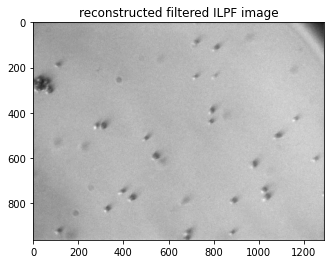

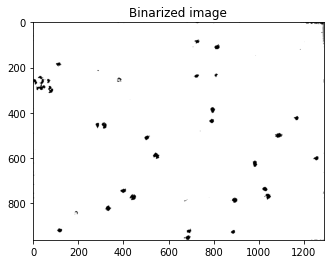

In [25]:
# Binarize the image to separate the organisms from the background
# Hint 1: You may need to remove some high-frequency noise from the image 
# before thresholding
# Hint 2: The background illumination in the image varies significantly, so a 
# single treshold for the entire will not work

#fft
fftI = np.fft.fft2(img)
dims = img.shape
#print(dims)
d0 = 200
#get the shape
x = range(dims[1])
y = range(dims[0])
xv,yv = np.meshgrid(x,y)



#get the mask
duv = np.linalg.norm([xv-dims[1]/2, yv-dims[0]/2], axis = 0)
ilpf_mask = duv < d0
#print(duv)
#plt.imshow(255*ilpf_mask,'gray')
#plt.show()


filterimg1 = np.fft.fftshift(fftI)* ilpf_mask

#ifft get original image
ori = np.fft.ifft2(filterimg1)
absori1 = abs(ori)

plt.imshow(absori1,'gray')
#show the image
plt.title('reconstructed filtered ILPF image')
plt.show()

#change the format
im = (absori1/np.max(absori1)*255).astype('uint8')
from skimage.filters.thresholding import threshold_otsu
from skimage.filters import threshold_local

#Adaptive threshold
thresh_img=cv2.adaptiveThreshold(im,im.max(),cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,31,10)
plt.imshow(thresh_img,'gray')
plt.title('Binarized image')
plt.show()

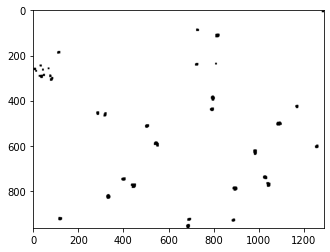

In [38]:
# Locate and plot the organisms present in the image
# Hint 3: You will need to apply a morphological filter to your binarized image 
# to remove spurious pixels left over by the binarization step
# morphological filter to close the objects

#adapt close to remove impurity
se = np.ones((8,8),np.uint8)
img_close = cv2.morphologyEx(thresh_img,cv2.MORPH_CLOSE,se)

plt.imshow(255*img_close,'gray')
plt.show()




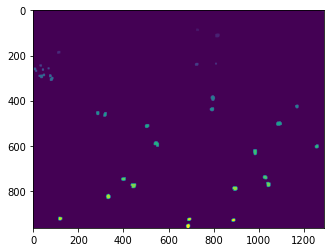

Centroid = (5.5, 1282.5)
Bounding box = (2, 1278, 10, 1288)
Centroid = (87.16176470588235, 727.7352941176471)
Bounding box = (82, 722, 93, 735)
Centroid = (111.89830508474576, 815.735593220339)
Bounding box = (104, 807, 121, 826)
Centroid = (186.50967741935483, 113.59354838709677)
Bounding box = (181, 107, 193, 121)
Centroid = (236.5, 809.5)
Bounding box = (233, 806, 241, 814)
Centroid = (239.55421686746988, 724.1325301204819)
Bounding box = (234, 717, 246, 732)
Centroid = (244.9090909090909, 33.59090909090909)
Bounding box = (241, 29, 250, 39)
Centroid = (257.5, 68.5)
Bounding box = (254, 65, 262, 73)
Centroid = (262.84656084656086, 9.417989417989418)
Bounding box = (255, 2, 273, 18)
Centroid = (263.0, 43.5)
Bounding box = (259, 40, 268, 48)
Centroid = (290.72360248447205, 38.701863354037265)
Bounding box = (282, 25, 301, 53)
Centroid = (299.33968253968254, 79.97460317460317)
Bounding box = (285, 72, 313, 90)
Centroid = (388.8308157099698, 795.607250755287)
Bounding box = (378, 787, 4

In [50]:
# Count the the number of organisms present in the image and compute their 
# average area in pixels

from skimage.morphology import label
from skimage.measure import regionprops

Sa = 0
n = 0
img_close = 255 - img_close 


img_labels = label(img_close)

plt.imshow(img_labels)
plt.show()

img_props = regionprops(img_labels)
for i in img_props:
  Sa = Sa + i.area
  n = n + 1
  print('Centroid = {}'.format(i.centroid))
  print('Bounding box = {}'.format(i.bbox))
print("########################################")
print("Label's number:", n)
print("Average area:", Sa / n)